Imports pyulog package. If this does not work, close Jupyter and run the following commands in the terminal 

In [204]:
import math
import pyulog
import numpy as np
from numpy.fft import fft as fft, fftshift as fftshift, fftfreq as fftfreq 

In [219]:
# for logs created by gazebo (simulation)
log_path = '/home/lucas/src/px4/Firmware/build/px4_sitl_default/tmp/rootfs/log'
log_date = '2019-08-14'
log_time = '13_14_23'
log_file = f'{log_path}/{log_date}/{log_time}.ulg'

# for Alessandro's logs
log_path = '/home/lucas/Documents/Log_Analysis/Vibrations/Logs'
log_index = '14'
log_date = '2019-4-17'
log_time = '15-58-16'
log_file = f'{log_path}/log_{log_index}_{log_date}-{log_time}.ulg'

print(log_file)

/home/lucas/Documents/Log_Analysis/Vibrations/Logs/log_14_2019-4-17-15-58-16.ulg


In [220]:
ulog = pyulog.ULog(log_file) # creates a ULog object 
datalist = ulog.data_list # is a list of Data objects, which contain the final topic data for a single topic and instance
for elem in datalist: # datalist has interesting attributes
    name = elem.name # is a string
    print('Topic name : ' + name) # displays all the names
    if(elem.name == 'vehicle_local_position'):
        value = elem.field_data # is a list of FieldData objects
        timestamp_idx = elem.timestamp_idx # is an int (dont)
        data = elem.data # is a dictionnary
    
        print(['Timestamp_idx : ', timestamp_idx])
    
        print(' Those are the FieldData objects :') # all existing datafields
        for element in value:
            print([' Value name : ' + element.field_name, 'Value type : ' + element.type_str])
            time_acc = data['timestamp']/1e6 # in s
            acc_z = data['az']

Topic name : input_rc
Topic name : vehicle_trajectory_waypoint
Topic name : vehicle_trajectory_waypoint_desired
Topic name : distance_sensor
Topic name : landing_gear
Topic name : vehicle_command
Topic name : wind_estimate
Topic name : vehicle_constraints
Topic name : position_control_setpoint_input
Topic name : flighttask_setpoint
Topic name : vehicle_local_position_setpoint
Topic name : vehicle_attitude_setpoint
Topic name : vehicle_global_position
Topic name : vehicle_gps_position
Topic name : vehicle_local_position
['Timestamp_idx : ', 0]
 Those are the FieldData objects :
[' Value name : timestamp', 'Value type : uint64_t']
[' Value name : ref_timestamp', 'Value type : uint64_t']
[' Value name : ref_lat', 'Value type : double']
[' Value name : ref_lon', 'Value type : double']
[' Value name : x', 'Value type : float']
[' Value name : y', 'Value type : float']
[' Value name : z', 'Value type : float']
[' Value name : delta_xy[0]', 'Value type : float']
[' Value name : delta_xy[1]', 

In [221]:
    if(elem.name =='actuator_outputs'):
        value = elem.field_data # is a list of FieldData objects
        timestamp_idx = elem.timestamp_idx # is an int (dont)
        data = elem.data # is a dictionnary
        print(['Timestamp_idx : ', timestamp_idx])
    
        print(' Those are the FieldData objects :') # all existing datafields
        for element in value:
            print([' Value name : ' + element.field_name, 'Value type : ' + element.type_str])
            time_rpm = data['timestamp']/1e6 # in s
            rpm1 = data['output[0]']
            rpm2 = data['output[1]']
            rpm3 = data['output[2]']
            rpm4 = data['output[3]']
            rpm5 = data['output[4]']
            rpm6 = data['output[5]']

['Timestamp_idx : ', 0]
 Those are the FieldData objects :
[' Value name : timestamp', 'Value type : uint64_t']
[' Value name : noutputs', 'Value type : uint32_t']
[' Value name : output[0]', 'Value type : float']
[' Value name : output[1]', 'Value type : float']
[' Value name : output[2]', 'Value type : float']
[' Value name : output[3]', 'Value type : float']
[' Value name : output[4]', 'Value type : float']
[' Value name : output[5]', 'Value type : float']
[' Value name : output[6]', 'Value type : float']
[' Value name : output[7]', 'Value type : float']
[' Value name : output[8]', 'Value type : float']
[' Value name : output[9]', 'Value type : float']
[' Value name : output[10]', 'Value type : float']
[' Value name : output[11]', 'Value type : float']
[' Value name : output[12]', 'Value type : float']
[' Value name : output[13]', 'Value type : float']
[' Value name : output[14]', 'Value type : float']
[' Value name : output[15]', 'Value type : float']


In [222]:
for index in range(len(time)):
    print([time_acc[index],acc_z[index]])
for index in range(len(time)):
    print([time_rpm[index],rpm1[index],rpm2[index],rpm3[index],rpm4[index],rpm5[index],rpm6[index]])

[8.393199, 0.14156748]
[8.402043, 0.16298571]
[8.498038, 0.15471523]
[8.602081, 0.13828272]
[8.706795, 0.13223098]
[8.803604, 0.12422905]
[8.90847, 0.12928796]
[9.013301, 0.12110632]
[9.110043, 0.12165021]
[9.2148, 0.1475375]
[9.312424, 0.11832601]
[9.417234, 0.12136611]
[9.514015, 0.058133848]
[9.618888, 0.4204076]
[9.723626, 0.4937797]
[9.820446, 0.2797003]
[9.925211, 0.08389813]
[10.022045, 0.11362972]
[10.126869, 0.013262481]
[10.223648, -0.06042427]
[10.328419, -0.49272555]
[10.433227, 0.6536095]
[10.530107, -0.05461287]
[10.634842, 0.06371274]
[10.731674, 0.028819712]
[10.836433, 0.10832764]
[10.933213, 0.08194874]
[11.038814, 0.08851003]
[11.143655, 0.08036003]
[11.240463, 0.07457559]
[11.345213, 0.07603601]
[11.442019, 0.07304778]
[11.546813, 0.08104464]
[11.651802, 0.06367264]
[11.748468, 0.07288151]
[11.853202, 0.059794568]
[11.950037, 0.07003416]
[12.054845, 0.055709433]
[12.159671, 0.06565682]
[12.256496, 0.059364296]
[12.362024, 0.05385239]
[12.458793, 0.05336308]
[12.5636

[214.624464, -0.002912169]
[214.729289, -0.006398249]
[214.834136, 0.002742241]
[214.930801, 0.001363381]
[215.031608, 0.0043473504]
[215.136414, 0.002562005]
[215.233315, 0.01027664]
[215.338052, 0.006226759]
[215.4388, -0.021085303]
[215.543652, -0.014731722]
[215.640485, 0.0028516464]
[215.745216, -0.0016187017]
[215.842002, 0.0039012467]
[215.942859, -0.013036796]
[216.048415, -0.023069853]
[216.153307, 0.00040878737]
[216.249997, 0.021446431]
[216.350781, -0.012457153]
[216.45559, -0.0066422555]
[216.552492, 0.008443859]
[216.657321, 0.010630768]
[216.762017, -0.008703272]
[216.858796, -0.018877113]
[216.963605, 0.03867497]
[217.060398, 0.006604876]
[217.161184, 0.009588834]
[217.266, 0.0037522353]
[217.370864, -0.006551121]
[217.471609, 0.0062519046]
[217.568411, -0.002849771]
[217.673305, 0.020340951]
[217.774805, 0.021924803]
[217.871594, 0.004939807]
[217.976452, 0.027728202]
[218.081212, -0.01460433]
[218.177996, -0.0100909425]
[218.27894, -0.01227167]
[218.383601, 0.00776902

[255.025994, 0.027466951]
[255.130786, -0.0058478373]
[255.227652, -0.015555943]
[255.332495, 0.014244515]
[255.433198, -0.031999372]
[255.538032, 0.016824277]
[255.63882, 0.0003054337]
[255.735589, 0.01633999]
[255.840453, 0.014759537]
[255.945192, 0.003843505]
[256.04202, 0.012103479]
[256.142853, -0.025782198]
[256.248469, -0.010148273]
[256.344408, 0.013081147]
[256.449196, 0.008487079]
[256.550826, -0.015709152]
[256.655654, -0.002198455]
[256.760474, -0.00013789893]
[256.857345, 0.018486688]
[256.961983, 0.006322685]
[257.062855, -0.0065992367]
[257.159653, -0.02503215]
[257.264402, 0.0020656101]
[257.369204, 0.013511565]
[257.46608, 0.004948322]
[257.570843, 0.009809537]
[257.667673, -0.010232912]
[257.772413, 0.006057191]
[257.877229, 0.012027036]
[257.977993, -0.002520932]
[258.074795, 0.0032437232]
[258.176498, -0.0038115212]
[258.281184, 0.0018506761]
[258.377994, 0.01793331]
[258.482873, -0.0067785704]
[258.587702, 0.0027305745]
[258.684485, 0.029400857]
[258.785211, -0.009

[287.416487, -0.0075568142]
[287.513189, -0.016719166]
[287.618081, 0.0026579313]
[287.714893, -0.0010225228]
[287.819598, -0.008686508]
[287.920467, -0.2750531]
[288.025238, -3.135366]
[288.122036, -1.3461393]
[288.226848, 1.3736308]
[288.323625, -0.50434005]
[288.428491, 0.6970157]
[288.529341, 0.08254957]
[288.634072, -0.84991807]
[288.735701, -0.32728833]
[288.832436, 0.25838512]
[288.93726, 0.63908184]
[289.034137, -1.5973989]
[289.14291, -0.7446728]
[289.239665, -0.16850269]
[289.344435, -3.0076764]
[289.441232, -5.223541]
[289.542063, -7.3147235]
[289.646864, -8.742319]
[289.751699, -10.706754]
[289.848433, -4.5802608]
[289.953394, -4.398319]
[290.050078, -2.069015]
[290.154832, -0.2670604]
[290.25161, 0.57370394]
[290.352481, 0.0074566887]
[290.458025, 0.0021869729]
[290.562823, -1.2140373]
[290.659642, -0.928252]
[290.764464, -2.0382245]
[290.865331, -2.2964058]
[290.962006, -0.049774595]
[291.066956, 1.7612882]
[291.167653, -0.95800775]
[291.272474, 1.0651283]
[291.369328, 0.

[491.157325, 0.0030071773]
[491.253985, 0.004373954]
[491.354858, -0.002248134]
[491.459671, -0.0020299694]
[491.564402, 0.0013140328]
[491.661254, 0.006106308]
[491.766058, -0.0005011147]
[491.867637, -0.00078987505]
[491.964409, -0.011397588]
[492.069244, -0.0002682841]
[492.174022, -0.003268074]
[492.270777, -0.0020312776]
[492.375598, 0.002428826]
[492.476492, -0.0039441558]
[492.573211, 0.0015328936]
[492.678021, -0.009059037]
[492.775605, -0.0001258118]
[492.88441, -0.0016336029]
[492.981211, -0.007961939]
[493.086129, -0.010530152]
[493.182849, -0.00015688293]
[493.287613, -0.002577964]
[493.388452, -0.0012480353]
[493.493205, 0.0017544794]
[493.594846, 0.00038253513]
[493.691633, 7.537392e-05]
[493.796423, -0.005654122]
[493.893185, -0.000704143]
[493.997985, -0.0057537737]
[494.098807, -0.014299539]
[494.203614, 0.0062276903]
[494.300432, -0.001076672]
[494.405341, -0.00029598922]
[494.502869, 0.02024687]
[494.603608, -0.0040895003]
[494.708523, -0.009345884]
[494.813241, -0.0

[537.460513, -0.0007404646]
[537.565361, -0.0027623659]
[537.662193, -0.00021613002]
[537.766796, 0.0028448275]
[537.863621, 0.0005100434]
[537.968434, 0.00814954]
[538.073244, -0.0066244337]
[538.174853, 0.014273592]
[538.271609, -0.0041791005]
[538.376446, 0.0029233582]
[538.477325, 0.01580863]
[538.574052, 0.013389561]
[538.679001, -0.000952547]
[538.783637, 0.0007710718]
[538.878083, -0.016487267]
[538.982068, -0.01871544]
[539.082894, 0.010963958]
[539.187701, -0.0014044975]
[539.284447, -0.0012496815]
[539.389207, 0.0015477948]
[539.49401, 0.0010858588]
[539.594816, 0.0049030585]
[539.691601, -0.0011111309]
[539.796419, 0.0012069307]
[539.893196, -0.011482338]
[539.994834, 0.0022605693]
[540.099616, -0.017518241]
[540.204464, 0.011815626]
[540.301246, 0.0007300936]
[540.406043, -0.0073101795]
[540.506829, -0.010705151]
[540.603674, -0.0062529626]
[540.708406, -0.001108337]
[540.813214, 0.004554104]
[540.914822, -0.0063945237]
[541.01159, -0.0128914295]
[541.116412, -0.0067921984]

[588.742015, 0.0029232325]
[588.850809, -0.009059968]
[588.947647, -0.016654491]
[589.052489, -0.00835682]
[589.14928, -0.0001007554]
[589.254049, 0.019594962]
[589.354865, -0.005705345]
[589.460465, -0.002677077]
[589.565196, -0.0064224633]
[589.662096, 0.0021736436]
[589.766873, 0.001211154]
[589.863732, 0.010914957]
[589.96839, 0.001764793]
[590.0653, -0.0026381498]
[590.170095, 0.0013422017]
[590.270795, 0.0063182013]
[590.371637, -0.00257517]
[590.477302, 0.015301314]
[590.573979, -0.0061307093]
[590.678806, -0.007086964]
[590.779597, -0.0029290726]
[590.878003, 0.00462861]
[590.982009, 0.0035156794]
[591.086043, -0.0007771238]
[591.186817, -0.006905218]
[591.283606, -0.006446507]
[591.389325, 0.01753391]
[591.486059, -0.0013150906]
[591.59485, 0.0056225215]
[591.691637, 0.00012194005]
[591.79643, -0.0032727306]
[591.893225, 0.017019855]
[591.998025, -0.0007327285]
[592.098821, 0.012937296]
[592.204427, 0.004962515]
[592.301278, 0.0008255838]
[592.406077, -0.005532801]
[592.502824

[806.550025, 0.36326602]
[806.65087, -0.58821875]
[806.747681, 0.72070897]
[806.852415, 0.7186056]
[806.9573, 0.7696065]
[807.062127, -0.0919663]
[807.163672, 0.3631142]
[807.268487, 1.1427708]
[807.373208, 1.0120592]
[807.470018, 1.5405223]
[807.574822, 0.617085]
[807.671664, -0.8869618]
[807.77247, 0.8934502]
[807.877404, -0.9402097]
[807.982106, -0.39219487]
[808.082901, 0.8287289]
[808.187684, -0.19268231]
[808.284468, 0.65926546]
[808.389207, 0.10233458]
[808.486165, -1.2017229]
[808.590849, -0.21199514]
[808.692455, 1.2450616]
[808.797296, 1.1076118]
[808.894006, 0.9174171]
[808.994817, -1.2602211]
[809.099629, -0.35957438]
[809.204463, 0.25048846]
[809.30126, -1.729141]
[809.406009, 0.7204533]
[809.502817, 2.1501827]
[809.6077, -2.3842137]
[809.708427, 1.1025722]
[809.813312, 1.2912134]
[809.918102, -0.082723856]
[810.014875, 0.95882875]
[810.119613, -0.5581975]
[810.22047, -0.8336976]
[810.317301, 0.57528627]
[810.422009, -1.9234134]
[810.523679, 0.67363095]
[810.628431, 0.9750

[870.347723, -0.4546649]
[870.44448, -3.2970788]
[870.549215, -0.5127313]
[870.646018, 0.07964478]
[870.750806, -0.6167199]
[870.85573, 1.772262]
[870.960551, -2.6558523]
[871.065239, -1.6897116]
[871.162099, -0.1872605]
[871.266865, 2.233286]
[871.363661, -0.6138543]
[871.468437, 0.91769814]
[871.573315, 0.5820672]
[871.670037, -1.4153413]
[871.774897, -1.350686]
[871.87171, -0.848013]
[871.97647, 0.87652344]
[872.081423, -0.8483565]
[872.186957, 1.5537249]
[872.291678, 2.568675]
[872.39648, -0.7015923]
[872.497253, -0.24646617]
[872.594002, 3.8213763]
[872.698821, 0.1546689]
[872.795649, 1.327861]
[872.900473, 1.3313636]
[873.005223, 0.22428289]
[873.102043, 2.1450493]
[873.206873, -0.83923185]
[873.307651, 0.07586733]
[873.408476, -0.060624503]
[873.513227, 0.08642574]
[873.610033, -1.2693899]
[873.714829, 0.26804683]
[873.812432, 0.037608277]
[873.916472, 1.4238274]
[874.013326, -1.5893687]
[874.118099, -0.23044278]
[874.223664, 0.3727393]
[874.324427, 1.6199543]
[874.425322, -1.65

[1110.851698, 1.7183933]
[1110.956478, 0.64103204]
[1111.053226, -0.5385792]
[1111.158821, 0.12287784]
[1111.263669, 2.645353]
[1111.368413, -0.62172955]
[1111.465207, -0.23086466]
[1111.57014, -0.23226333]
[1111.666861, 1.3907205]
[1111.775645, 1.1755962]
[1111.880477, -1.246525]
[1111.98524, -0.6787619]
[1112.086078, -1.908145]
[1112.182898, -1.1720066]
[1112.287663, 1.0144029]
[1112.384429, 0.14590745]
[1112.489227, -0.27016065]
[1112.594076, 0.41795444]
[1112.698831, -1.2147874]
[1112.800488, -2.02254]
[1112.896463, 0.00688241]
[1113.002001, 0.062568046]
[1113.098849, -0.13895454]
[1113.20364, 2.5489898]
[1113.308484, 0.8710817]
[1113.40527, 2.538266]
[1113.510038, 1.5317265]
[1113.606821, 0.27242547]
[1113.711627, -0.5385845]
[1113.812439, 0.57815564]
[1113.913413, 0.05138119]
[1114.018017, -0.33622333]
[1114.114802, -0.6603729]
[1114.219681, -1.380397]
[1114.320454, 0.8075216]
[1114.421275, 0.8939876]
[1114.52605, 1.3003914]
[1114.62281, 0.15471351]
[1114.724473, -0.6375471]
[111

[1182.241282, 2.6676822]
[1182.346009, 2.0970175]
[1182.450846, 1.1822745]
[1182.548444, -2.010988]
[1182.652479, 0.46105674]
[1182.749417, 1.6882777]
[1182.854863, -1.141282]
[1182.955686, -0.9721835]
[1183.060521, 0.13877764]
[1183.157344, -0.9024087]
[1183.262034, 2.3790941]
[1183.358914, 0.86596143]
[1183.46368, 0.4318215]
[1183.560629, 1.1019845]
[1183.665246, 2.6088881]
[1183.770167, 0.22898737]
[1183.866802, -2.9493444]
[1183.971672, -0.8415161]
[1184.068465, 3.7777123]
[1184.169338, -1.644974]
[1184.274064, -0.9803791]
[1184.378832, -1.1087583]
[1184.48048, 0.11158075]
[1184.584414, 0.5166986]
[1184.682017, -1.2837797]
[1184.782876, -1.1789273]
[1184.883617, -0.38846678]
[1184.988475, -0.93627626]
[1185.093224, -3.0733402]
[1185.190009, -2.5735328]
[1185.294841, -1.1348641]
[1185.39165, -0.44469166]
[1185.496498, 0.0996435]
[1185.601243, -0.29385746]
[1185.698014, 2.3101232]
[1185.798867, 4.2918963]
[1185.903628, -1.6640546]
[1186.000423, -1.2686296]
[1186.105235, -0.20310567]


[1417.969235, 0.041418646]
[1418.070062, -0.18485734]
[1418.166879, 3.853359]
[1418.267638, 1.1848787]
[1418.372481, 0.51452285]
[1418.477252, -2.646034]
[1418.574831, -1.4113734]
[1418.679629, -0.91378856]
[1418.780412, 1.4099933]
[1418.877274, 0.37473717]
[1418.982081, -0.3089926]
[1419.078831, -1.193379]
[1419.183692, 1.8179607]
[1419.28843, 0.77985495]
[1419.389274, -0.5323524]
[1419.486196, -0.7937554]
[1419.591679, 0.3789385]
[1419.688419, -1.3325628]
[1419.789285, -0.97707015]
[1419.894002, 0.03244256]
[1419.998852, 0.0038284024]
[1420.095631, 1.767352]
[1420.196428, 1.1974127]
[1420.301305, 0.32014105]
[1420.398037, -0.5560313]
[1420.502853, 0.44332436]
[1420.604417, 0.13967317]
[1420.709261, 0.4171216]
[1420.806054, -0.80110043]
[1420.910814, -0.20679836]
[1421.007661, 0.073806316]
[1421.112444, 0.42458615]
[1421.217304, 0.5612978]
[1421.318047, 0.24384253]
[1421.418802, 0.89329374]
[1421.515606, 0.74903566]
[1421.620447, -0.13188371]
[1421.717243, -1.6783559]
[1421.826854, 0.

[1462.429242, -2.398881]
[1462.526001, -0.5742172]
[1462.626868, -4.5905423]
[1462.73161, -1.5425328]
[1462.828447, -1.1267439]
[1462.93327, -1.1385068]
[1463.038864, -2.05392]
[1463.135657, 0.08287274]
[1463.236422, -1.0086364]
[1463.341275, 0.6984587]
[1463.438072, 1.0497631]
[1463.542842, -2.1331782]
[1463.647657, -1.1097612]
[1463.748413, -1.4009951]
[1463.845264, -5.219119]
[1463.950026, -2.7915125]
[1464.05161, 0.69813234]
[1464.148437, -3.2199218]
[1464.253212, 0.48933822]
[1464.35806, 1.2110237]
[1464.45884, 1.1643362]
[1464.555644, 0.39977014]
[1464.660528, 0.98230916]
[1464.757397, -0.3719884]
[1464.862005, 1.8193849]
[1464.966837, -1.4792963]
[1465.068464, -0.2632542]
[1465.165208, 1.7696179]
[1465.270053, -2.5168629]
[1465.366894, 0.8431995]
[1465.471709, -1.6664435]
[1465.572436, -0.28769398]
[1465.677319, 1.8900938]
[1465.774054, -0.4444596]
[1465.874811, -0.06646903]
[1465.979683, 0.121651106]
[1466.076473, 1.2117054]
[1466.182026, -2.0220418]
[1466.282853, 0.48065364]
[

[1499.627659, 0.004395779]
[1499.728425, 0.0054220967]
[1499.83403, -0.008482548]
[1499.938878, 0.0037227075]
[1500.035671, 0.0028721355]
[1500.13641, -0.004083535]
[1500.241262, 0.008084011]
[1500.34201, -0.010932858]
[1500.446859, 0.0068400186]
[1500.543651, -0.0043931114]
[1500.649193, -0.00027014673]
[1500.745184, 0.007984165]
[1500.850814, 0.0066622933]
[1500.951687, 0.002520647]
[1501.056511, 0.0012823679]
[1501.153218, -0.0024799174]
[1501.258139, -0.0014541128]
[1501.358828, -0.0012894678]
[1501.455632, 0.0060209366]
[1501.560524, -0.009414802]
[1501.665237, 0.0110519305]
[1501.762885, 0.007681018]
[1501.867622, 0.013340201]
[1501.968409, 0.0058700624]
[1502.065287, 0.0043219253]
[1502.169985, 0.012151834]
[1502.27083, 0.0032139998]
[1502.375617, -0.00972307]
[1502.472401, -0.0056196633]
[1502.573215, 0.0028861053]
[1502.677984, -0.00093604234]
[1502.774909, -0.005846249]
[1502.880445, 0.0059631946]
[1502.977348, -0.030981028]
[1503.082012, 0.01388237]
[1503.186789, -0.00062032

[106.732159, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0]
[106.832202, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0]
[106.933818, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0]
[107.034564, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0]
[107.135369, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0]
[107.240154, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0]
[107.340952, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0]
[107.441754, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0]
[107.54257, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0]
[107.643359, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0]
[107.744163, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0]
[107.848947, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0]
[107.949821, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0]
[108.050549, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0]
[108.152159, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0]
[108.252175, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0]
[108.353749, 1190.0, 1190

[153.026559, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0]
[153.127399, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0]
[153.228167, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0]
[153.328952, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0]
[153.430564, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0]
[153.531376, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0]
[153.636174, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0]
[153.73696, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0]
[153.837801, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0]
[153.938574, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0]
[154.03937, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0]
[154.140164, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0]
[154.244957, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0]
[154.345814, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0]
[154.446564, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0]
[154.548172, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0]
[154.648171, 1190.0, 1190.

[196.89138, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0]
[196.992202, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0]
[197.093008, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0]
[197.193754, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0]
[197.29858, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0]
[197.40016, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0]
[197.500957, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0]
[197.601771, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0]
[197.702554, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0]
[197.803364, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0]
[197.904206, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0]
[198.008952, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0]
[198.109762, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0]
[198.210568, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0]
[198.311365, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0]
[198.412169, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0]
[198.516964, 1190.0, 1190.0

[406.168168, 1518.7723, 1584.3652, 1501.6398, 1601.4978, 1533.9186, 1569.219]
[406.273001, 1520.8636, 1582.784, 1490.1865, 1613.461, 1539.351, 1564.2966]
[406.373801, 1516.64, 1590.051, 1504.2621, 1602.429, 1534.2234, 1572.4677]
[406.474576, 1512.1885, 1598.8488, 1497.7941, 1613.2433, 1548.3615, 1562.6759]
[406.575376, 1520.068, 1590.1824, 1507.1655, 1603.085, 1544.87, 1565.3804]
[406.676179, 1520.9883, 1589.0625, 1503.9868, 1606.064, 1543.9728, 1566.0781]
[406.780977, 1520.6117, 1587.7302, 1508.7328, 1599.6091, 1544.1995, 1564.1425]
[406.885811, 1522.914, 1583.7716, 1508.6366, 1598.049, 1540.4353, 1566.2502]
[406.987416, 1523.9396, 1583.8693, 1516.499, 1591.3098, 1533.3643, 1574.4446]
[407.088169, 1524.2438, 1581.106, 1509.8481, 1595.5017, 1534.295, 1571.0548]
[407.188966, 1532.9403, 1573.2838, 1502.0168, 1604.2074, 1535.0679, 1571.1564]
[407.289766, 1527.99, 1578.8378, 1509.5996, 1597.2281, 1534.7897, 1572.0381]
[407.390629, 1532.6886, 1575.7653, 1512.3138, 1596.1399, 1536.165, 1572.

[459.207403, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0]
[459.308197, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0]
[459.409821, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0]
[459.510562, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0]
[459.611376, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0]
[459.712168, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0]
[459.812965, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0]
[459.917757, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0]
[460.018571, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0]
[460.119365, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0]
[460.220167, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0]
[460.321757, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0]
[460.422576, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0]
[460.523376, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0]
[460.628163, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0]
[460.728962, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0]
[460.829754, 1190.0, 119

[496.467409, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0]
[496.568164, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0]
[496.668952, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0]
[496.769818, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0]
[496.871364, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0]
[496.972166, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0]
[497.076965, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0]
[497.177767, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0]
[497.278574, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0]
[497.379366, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0]
[497.480204, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0]
[497.584959, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0]
[497.681752, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0]
[497.787395, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0]
[497.888166, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0]
[497.988953, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0]
[498.089757, 1190.0, 119

[676.508172, 1561.2195, 1546.4158, 1530.284, 1577.3513, 1602.0779, 1505.5574]
[676.608969, 1556.2932, 1550.9547, 1526.6481, 1580.5999, 1596.311, 1510.9369]
[676.709762, 1557.5823, 1549.3256, 1528.5183, 1578.3894, 1597.8339, 1509.074]
[676.810574, 1558.9908, 1549.1567, 1531.3431, 1576.8046, 1594.2449, 1513.9028]
[676.91222, 1557.6411, 1550.2521, 1535.5127, 1572.3805, 1588.778, 1519.1152]
[677.012974, 1560.6884, 1543.4121, 1538.0704, 1566.0299, 1585.772, 1518.3285]
[677.113865, 1558.2085, 1547.2238, 1534.0939, 1571.3383, 1594.4805, 1510.9518]
[677.218577, 1560.4225, 1544.055, 1531.8794, 1572.5981, 1588.6045, 1515.8729]
[677.319377, 1559.7635, 1545.3097, 1531.5404, 1573.5328, 1585.899, 1519.1741]
[677.420172, 1559.2772, 1546.9104, 1534.1229, 1572.0647, 1587.6097, 1518.5779]
[677.520971, 1553.2615, 1550.7675, 1529.4401, 1574.5887, 1585.2349, 1518.794]
[677.621759, 1560.7769, 1543.6559, 1533.8024, 1570.6304, 1586.3513, 1518.0814]
[677.722584, 1559.7369, 1542.0405, 1530.3647, 1571.4127, 1587

[756.272201, 1544.1052, 1555.2134, 1513.7823, 1585.5363, 1576.6144, 1522.7042]
[756.372962, 1551.889, 1547.4175, 1512.6322, 1586.6743, 1568.5281, 1530.7784]
[756.473761, 1551.4131, 1552.8593, 1517.584, 1586.6885, 1573.247, 1531.0254]
[756.574615, 1558.7089, 1544.5742, 1514.4095, 1588.8734, 1567.1299, 1536.1531]
[756.679432, 1550.844, 1550.4747, 1512.2656, 1589.0531, 1574.2235, 1527.0952]
[756.780963, 1557.3256, 1546.6218, 1518.625, 1585.3223, 1573.1154, 1530.8319]
[756.885759, 1554.9172, 1551.0721, 1522.486, 1583.5034, 1573.8591, 1532.1302]
[756.99058, 1552.7147, 1549.7411, 1513.1031, 1589.3528, 1572.6836, 1529.7723]
[757.091372, 1553.4845, 1552.0175, 1518.7993, 1586.7026, 1577.6078, 1527.8943]
[757.192164, 1560.9475, 1540.2146, 1525.5718, 1575.5903, 1571.5789, 1529.5833]
[757.29298, 1547.8633, 1553.0618, 1524.3025, 1576.6226, 1569.3749, 1531.5502]
[757.393766, 1552.2037, 1547.3547, 1520.6819, 1578.8766, 1565.0845, 1534.474]
[757.494571, 1550.3103, 1551.6691, 1515.6224, 1586.3569, 1579

[797.768974, 1543.1764, 1549.5372, 1537.3912, 1555.3224, 1566.0925, 1526.621]
[797.86977, 1538.4246, 1553.2961, 1534.1387, 1557.582, 1567.0734, 1524.6473]
[797.970567, 1539.3574, 1551.6052, 1538.2577, 1552.705, 1560.006, 1530.9567]
[798.071367, 1543.7131, 1551.0876, 1538.3896, 1556.4111, 1562.032, 1532.7687]
[798.172182, 1539.5236, 1558.1244, 1545.5759, 1552.072, 1565.1091, 1532.5388]
[798.277017, 1535.745, 1560.0149, 1546.4774, 1549.2825, 1554.2931, 1541.4668]
[798.377782, 1537.9457, 1554.4521, 1546.0383, 1546.3595, 1550.1182, 1542.2797]
[798.478585, 1538.9941, 1553.531, 1544.1558, 1548.3694, 1548.7715, 1543.7537]
[798.579381, 1529.3904, 1562.4883, 1540.7922, 1551.0864, 1556.0026, 1535.8761]
[798.680235, 1534.2253, 1557.5323, 1545.5485, 1546.2092, 1553.0613, 1538.6964]
[798.780973, 1544.24, 1553.2866, 1575.0664, 1522.4602, 1588.9044, 1508.6221]
[798.885774, 1585.617, 1518.0895, 1621.5464, 1482.16, 1497.757, 1605.9495]
[798.986567, 1575.5955, 1528.0198, 1584.9845, 1518.6307, 1502.1298,

[943.649819, 1541.4902, 1561.5176, 1560.1781, 1542.8298, 1562.739, 1540.2689]
[943.750566, 1538.5526, 1567.4716, 1555.6434, 1550.3806, 1562.9377, 1543.0864]
[943.852163, 1539.9197, 1568.753, 1563.9622, 1544.7104, 1552.2119, 1556.4608]
[943.956252, 1547.2704, 1563.0409, 1568.6083, 1541.7029, 1550.9033, 1559.408]
[944.057804, 1550.5057, 1557.9078, 1564.8278, 1543.5858, 1551.4386, 1556.975]
[944.158604, 1538.1998, 1569.9652, 1569.8225, 1538.3427, 1547.5422, 1560.6228]
[944.259427, 1535.9722, 1573.44, 1569.6646, 1539.7476, 1550.5381, 1558.874]
[944.360236, 1522.9254, 1586.0729, 1562.1874, 1546.8109, 1566.0983, 1542.9]
[944.460966, 1519.7382, 1588.0748, 1555.5878, 1552.2251, 1570.2051, 1537.6078]
[944.565802, 1524.2025, 1580.0813, 1547.7534, 1556.5304, 1564.104, 1540.1797]
[944.666629, 1516.9548, 1584.3081, 1546.9989, 1554.264, 1558.0411, 1543.2218]
[944.767396, 1522.2924, 1576.698, 1550.8851, 1548.1051, 1552.1685, 1546.8218]
[944.868206, 1515.8749, 1582.3564, 1552.5186, 1545.7128, 1559.642

[997.500997, 1552.0491, 1538.7898, 1489.4255, 1601.4133, 1546.581, 1544.2578]
[997.601781, 1553.9589, 1544.2974, 1498.876, 1599.3802, 1554.0448, 1544.2114]
[997.706566, 1550.5018, 1546.7051, 1501.9828, 1595.224, 1556.4421, 1540.7646]
[997.807457, 1544.9987, 1548.7487, 1494.9126, 1598.8347, 1555.8597, 1537.8876]
[997.908175, 1546.7181, 1542.5011, 1482.4755, 1606.7438, 1552.734, 1536.4852]
[998.009013, 1551.4895, 1539.0238, 1488.0193, 1602.494, 1555.4176, 1535.0958]
[998.109773, 1554.9799, 1524.6809, 1486.9222, 1592.7385, 1549.2739, 1530.3868]
[998.210613, 1549.363, 1520.0951, 1473.5199, 1595.9382, 1544.637, 1524.8212]
[998.315425, 1547.2094, 1525.4144, 1486.501, 1586.1229, 1537.2493, 1535.3745]
[998.416198, 1558.4736, 1532.3402, 1483.4512, 1607.3625, 1560.5466, 1530.2671]
[998.516967, 1564.0216, 1536.6956, 1501.5872, 1599.13, 1565.6487, 1535.0685]
[998.618568, 1558.4178, 1544.1268, 1498.7484, 1603.7963, 1566.4407, 1536.104]
[998.719379, 1561.1237, 1543.0912, 1502.8704, 1601.3445, 1564.5

[1021.41776, 1556.6283, 1546.7169, 1521.9386, 1581.4067, 1574.915, 1528.4303]
[1021.518567, 1552.6954, 1553.8666, 1526.0574, 1580.5046, 1574.6914, 1531.8707]
[1021.619369, 1550.9438, 1556.4379, 1524.4818, 1582.8998, 1572.8386, 1534.543]
[1021.72022, 1551.9481, 1556.3452, 1520.6049, 1587.6886, 1577.6844, 1530.6089]
[1021.824986, 1550.3461, 1560.2664, 1519.2339, 1591.3785, 1580.9297, 1529.6827]
[1021.925773, 1554.9094, 1554.0731, 1527.9165, 1581.0662, 1573.4125, 1535.5701]
[1022.026587, 1551.7594, 1558.9717, 1523.5455, 1587.1855, 1574.3971, 1536.334]
[1022.128168, 1558.9729, 1551.6993, 1527.8071, 1582.8651, 1575.3936, 1535.2786]
[1022.228183, 1566.8679, 1543.2919, 1531.6558, 1578.5042, 1573.4507, 1536.7091]
[1022.328957, 1559.887, 1549.873, 1532.7097, 1577.0503, 1571.1986, 1538.5614]
[1022.430563, 1562.2178, 1546.7523, 1529.0707, 1579.8994, 1572.7489, 1536.2212]
[1022.53538, 1561.0667, 1548.7933, 1527.4106, 1582.4493, 1576.9371, 1532.9229]
[1022.636178, 1554.5472, 1553.5393, 1521.0928, 1

[1233.803373, 1558.5842, 1617.7211, 1538.6233, 1637.682, 1564.0321, 1612.2732]
[1233.904168, 1538.294, 1633.5919, 1518.7548, 1653.1311, 1568.29, 1603.5958]
[1234.00901, 1538.8301, 1594.9441, 1519.8038, 1613.9702, 1562.158, 1571.6161]
[1234.109763, 1518.7413, 1590.8536, 1491.8209, 1617.774, 1561.0603, 1548.5347]
[1234.210624, 1516.3867, 1585.3292, 1477.6501, 1624.0658, 1541.0405, 1560.6753]
[1234.311375, 1499.7128, 1590.676, 1458.3329, 1632.0558, 1518.5863, 1571.8024]
[1234.412175, 1495.186, 1592.5419, 1457.715, 1630.0131, 1507.923, 1579.805]
[1234.516963, 1484.0812, 1590.2228, 1445.1366, 1629.1672, 1504.7836, 1569.5204]
[1234.61782, 1474.0255, 1591.8916, 1438.993, 1626.9242, 1502.7762, 1563.141]
[1234.718587, 1476.1483, 1586.468, 1451.9177, 1610.6986, 1509.8202, 1552.7961]
[1234.820244, 1473.3636, 1577.0974, 1435.2106, 1615.2504, 1508.8945, 1541.5665]
[1234.920981, 1488.4392, 1574.5267, 1434.2589, 1628.707, 1508.7002, 1554.2659]
[1235.021832, 1487.714, 1573.1914, 1460.8802, 1600.0251, 

[1281.833768, 1528.7994, 1570.8776, 1489.1586, 1610.5184, 1539.3486, 1560.3284]
[1281.934578, 1531.1101, 1574.9661, 1501.8171, 1604.2592, 1540.5736, 1565.5027]
[1282.039367, 1526.5443, 1580.6764, 1454.6825, 1652.5382, 1513.7676, 1593.4531]
[1282.140179, 1546.692, 1592.493, 1478.8567, 1660.3284, 1523.6044, 1615.5807]
[1282.241827, 1554.2001, 1615.9967, 1515.2303, 1654.9666, 1571.1287, 1599.0681]
[1282.342584, 1543.1648, 1618.2825, 1536.5183, 1624.929, 1594.0541, 1567.3932]
[1282.443386, 1545.4354, 1611.1398, 1530.2904, 1626.2848, 1585.6669, 1570.9083]
[1282.544176, 1541.5624, 1621.1686, 1528.806, 1633.9249, 1566.041, 1596.69]
[1282.648977, 1562.8933, 1614.3287, 1531.5432, 1645.679, 1562.6793, 1614.5428]
[1282.749803, 1560.7905, 1631.0535, 1533.7865, 1658.0575, 1583.8518, 1607.9922]
[1282.850583, 1565.4374, 1634.7968, 1537.6096, 1662.6244, 1583.8987, 1616.3354]
[1282.95137, 1570.6096, 1641.2097, 1536.8765, 1674.9427, 1587.0707, 1624.7485]
[1283.052167, 1583.9395, 1629.342, 1538.8542, 167

[1335.016185, 1535.3066, 1583.7896, 1559.0121, 1560.084, 1601.0895, 1518.0066]
[1335.120973, 1541.6538, 1579.7549, 1560.7372, 1560.6715, 1612.4, 1509.0087]
[1335.221776, 1543.401, 1575.3007, 1560.6263, 1558.0753, 1608.8232, 1509.8785]
[1335.322611, 1542.5472, 1572.0084, 1557.65, 1556.9055, 1601.8768, 1512.6788]
[1335.423368, 1542.6119, 1571.5502, 1565.9281, 1548.2341, 1602.7673, 1511.3948]
[1335.524168, 1535.1588, 1578.7423, 1562.2148, 1551.6862, 1603.3993, 1510.5017]
[1335.625018, 1560.7858, 1579.5443, 1574.7972, 1565.5327, 1625.9392, 1514.3909]
[1335.729781, 1552.8988, 1577.7957, 1556.5096, 1574.1848, 1587.6189, 1543.0756]
[1335.830611, 1545.029, 1576.7155, 1542.6621, 1579.0825, 1599.7437, 1522.001]
[1335.932163, 1539.6323, 1580.6603, 1567.5104, 1552.7822, 1603.9917, 1516.301]
[1336.032228, 1535.1724, 1578.78, 1557.0131, 1556.9393, 1599.0928, 1514.8596]
[1336.133772, 1534.5499, 1577.6815, 1570.916, 1541.3153, 1606.8555, 1505.3759]
[1336.234575, 1538.3876, 1568.8805, 1567.3899, 1539.8

[1508.637757, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0]
[1508.7386, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0]
[1508.843375, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0]
[1508.944164, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0]
[1509.045012, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0]
[1509.146576, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0]
[1509.247388, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0]
[1509.348191, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0]
[1509.448959, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0]
[1509.553811, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0]
[1509.654557, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0]
[1509.755465, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0]
[1509.85617, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0]
[1509.956967, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0]
[1510.057759, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0]
[1510.159373, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0, 1190.0]
[1510.26415

[1563.490562, 1557.8175, 1546.9146, 1541.3768, 1563.3552, 1564.0859, 1540.6461]
[1563.591375, 1565.7461, 1540.6992, 1530.792, 1575.6532, 1562.6943, 1543.7509]
[1563.692168, 1552.7445, 1555.1865, 1521.0446, 1586.8865, 1575.0145, 1532.9166]
[1563.796967, 1551.7012, 1564.8629, 1528.0681, 1588.4961, 1581.7787, 1534.7854]
[1563.897764, 1556.7407, 1569.0991, 1521.5033, 1604.3365, 1586.2067, 1539.6332]
[1563.999402, 1558.5007, 1576.7576, 1531.3792, 1603.8792, 1588.1627, 1547.0956]
[1564.10018, 1561.3729, 1578.7898, 1532.4773, 1607.6853, 1590.0392, 1550.1235]
[1564.200966, 1568.5665, 1574.4663, 1535.3582, 1607.6748, 1586.398, 1556.6349]
[1564.301771, 1542.8523, 1579.1362, 1513.1548, 1608.8337, 1599.8472, 1522.1412]
[1564.402614, 1535.7736, 1587.2561, 1502.4534, 1620.5763, 1590.7395, 1532.2902]
[1564.507412, 1538.8805, 1576.5623, 1501.8645, 1613.5782, 1589.6775, 1525.7653]
[1564.608171, 1529.1227, 1580.817, 1499.4855, 1610.4542, 1574.9674, 1534.9723]
[1564.709023, 1545.5015, 1564.442, 1500.5464

<IPython.core.display.Javascript object>


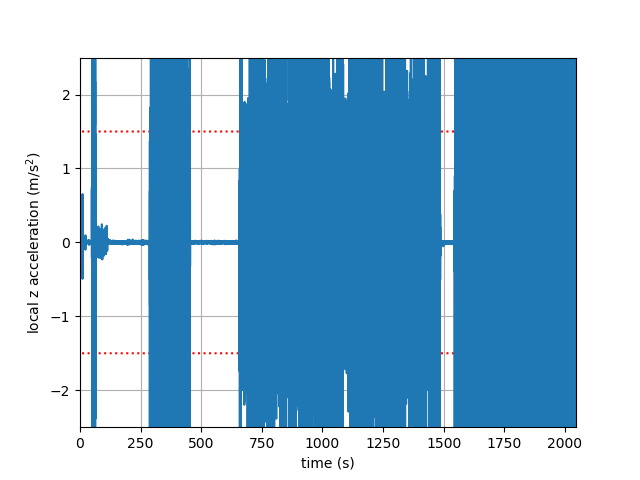

In [232]:
from matplotlib import pyplot as plt
%matplotlib notebook
threshold = 1.5 # m/s^2
threshold_list = [threshold for timestamp in time_acc]

plt.plot(time_acc,threshold_list,'r:')
plt.plot(time_acc,[-elem for elem in threshold_list],'r:')
plt.plot(time_acc,acc_z)
plt.xlabel('time (s)')
plt.ylabel('local z acceleration (m/s$^2$)')
plt.grid()
plt.axis([0, time_acc[-1], -threshold-1, threshold+1])
plt.show()

<IPython.core.display.Javascript object>


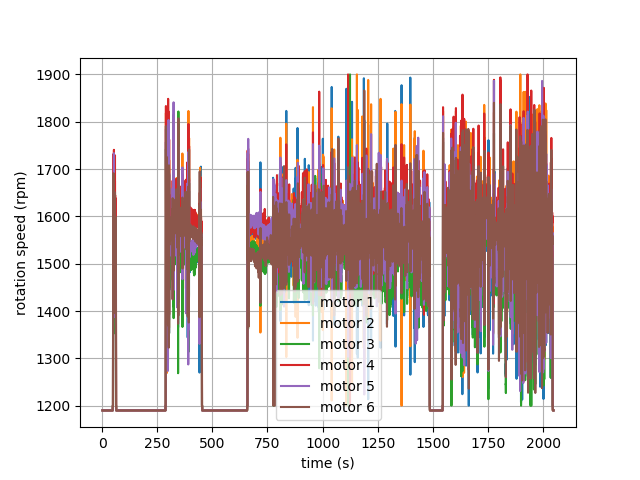

In [225]:
plt.figure()
plt.plot(time_rpm,rpm1,label="motor 1")
plt.plot(time_rpm,rpm2,label="motor 2")
plt.plot(time_rpm,rpm3,label="motor 3")
plt.plot(time_rpm,rpm4,label="motor 4")
plt.plot(time_rpm,rpm5,label="motor 5")
plt.plot(time_rpm,rpm6,label="motor 6")
plt.xlabel('time (s)')
plt.ylabel('rotation speed (rpm)')
plt.grid()
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


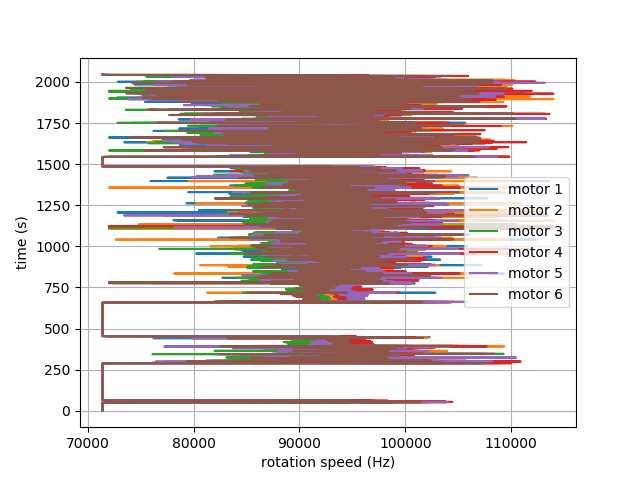

In [226]:
pfreq1 = rpm1*60 # convert to Hz
pfreq2 = rpm2*60
pfreq3 = rpm3*60
pfreq4 = rpm4*60
pfreq5 = rpm5*60
pfreq6 = rpm6*60

plt.figure()
plt.plot(pfreq1,time_rpm,label="motor 1")
plt.plot(pfreq2,time_rpm,label="motor 2")
plt.plot(pfreq3,time_rpm,label="motor 3")
plt.plot(pfreq4,time_rpm,label="motor 4")
plt.plot(pfreq5,time_rpm,label="motor 5")
plt.plot(pfreq6,time_rpm,label="motor 6")
plt.xlabel('rotation speed (Hz)')
plt.ylabel('time (s)')
plt.grid()
plt.legend()
plt.show()

In [227]:
N = len(acc_z) # is an integer
dt = np.diff(time)
print(N)
print(type(N))
acc_z_complex_spectrum = fft(acc_z, N)
acc_z_complex_spectrum = acc_z_complex_spectrum
acc_z_amplitudes = np.abs(acc_z_complex_spectrum)
acc_z_phase = np.angle(acc_z_complex_spectrum)
freq = fftfreq(N)*360/(2*math.pi)
Apos = acc_z_amplitudes[:N//2]
Aneg = np.flip(acc_z_amplitudes[N//2+1:])
A = Apos + Aneg
for f in np.flip(freq[N//2:]): #only take the positive frequencies
    print(f)

20039
<class 'int'>
-0.00285921350931096
-0.00571842701862192
-0.00857764052793288
-0.01143685403724384
-0.0142960675465548
-0.01715528105586576
-0.02001449456517672
-0.02287370807448768
-0.02573292158379864
-0.0285921350931096
-0.031451348602420555
-0.03431056211173152
-0.037169775621042477
-0.04002898913035344
-0.0428882026396644
-0.04574741614897536
-0.04860662965828632
-0.05146584316759728
-0.05432505667690823
-0.0571842701862192
-0.060043483695530156
-0.06290269720484111
-0.06576191071415206
-0.06862112422346305
-0.071480337732774
-0.07433955124208495
-0.0771987647513959
-0.08005797826070687
-0.08291719177001784
-0.0857764052793288
-0.08863561878863975
-0.09149483229795072
-0.09435404580726169
-0.09721325931657264
-0.1000724728258836
-0.10293168633519456
-0.10579089984450553
-0.10865011335381645
-0.11150932686312744
-0.1143685403724384
-0.11722775388174934
-0.12008696739106031
-0.12294618090037127
-0.12580539440968222
-0.1286646079189932
-0.13152382142830413
-0.13438303493761514
-

-7.879992431661005
-7.882851645170316
-7.885710858679628
-7.888570072188938
-7.8914292856982495
-7.89428849920756
-7.89714771271687
-7.900006926226182
-7.902866139735493
-7.905725353244804
-7.908584566754114
-7.9114437802634265
-7.914302993772737
-7.917162207282047
-7.920021420791359
-7.92288063430067
-7.925739847809981
-7.928599061319291
-7.9314582748286035
-7.934317488337914
-7.937176701847225
-7.940035915356535
-7.942895128865846
-7.945754342375158
-7.948613555884468
-7.95147276939378
-7.95433198290309
-7.9571911964124
-7.960050409921712
-7.962909623431023
-7.9657688369403346
-7.968628050449644
-7.971487263958957
-7.974346477468267
-7.977205690977577
-7.98006490448689
-7.9829241179962
-7.985783331505512
-7.988642545014821
-7.991501758524135
-7.994360972033444
-7.997220185542755
-8.000079399052066
-8.002938612561376
-8.005797826070689
-8.00865703958
-8.01151625308931
-8.01437546659862
-8.017234680107931
-8.020093893617243
-8.022953107126554
-8.025812320635865
-8.028671534145175
-8.03

-16.311813070619024
-16.314672284128335
-16.31753149763765
-16.32039071114696
-16.32324992465627
-16.32610913816558
-16.32896835167489
-16.331827565184206
-16.334686778693513
-16.337545992202823
-16.340405205712134
-16.343264419221445
-16.34612363273076
-16.34898284624007
-16.35184205974938
-16.35470127325869
-16.357560486768
-16.360419700277312
-16.363278913786623
-16.366138127295933
-16.368997340805244
-16.371856554314558
-16.37471576782387
-16.37757498133318
-16.38043419484249
-16.3832934083518
-16.38615262186111
-16.38901183537042
-16.391871048879732
-16.394730262389043
-16.397589475898357
-16.400448689407668
-16.40330790291698
-16.40616711642629
-16.4090263299356
-16.41188554344491
-16.41474475695422
-16.41760397046353
-16.420463183972842
-16.423322397482153
-16.426181610991467
-16.429040824500778
-16.431900038010088
-16.434759251519395
-16.43761846502871
-16.44047767853802
-16.44333689204733
-16.44619610555664
-16.44905531906595
-16.451914532575266
-16.454773746084577
-16.4576329

-25.73006237028933
-25.73292158379864
-25.73578079730795
-25.73864001081726
-25.74149922432657
-25.744358437835885
-25.747217651345196
-25.750076864854506
-25.752936078363813
-25.75579529187313
-25.75865450538244
-25.76151371889175
-25.76437293240106
-25.76723214591037
-25.77009135941968
-25.77295057292899
-25.775809786438302
-25.778668999947612
-25.781528213456927
-25.784387426966237
-25.787246640475548
-25.79010585398486
-25.792965067494166
-25.795824281003483
-25.79868349451279
-25.8015427080221
-25.80440192153141
-25.807261135040722
-25.810120348550036
-25.812979562059347
-25.815838775568658
-25.818697989077968
-25.82155720258728
-25.824416416096593
-25.827275629605904
-25.830134843115214
-25.832994056624525
-25.835853270133832
-25.838712483643143
-25.841571697152453
-25.844430910661764
-25.847290124171074
-25.85014933768039
-25.8530085511897
-25.85586776469901
-25.85872697820832
-25.86158619171763
-25.864445405226945
-25.867304618736256
-25.870163832245566
-25.873023045754877
-25.

<IPython.core.display.Javascript object>


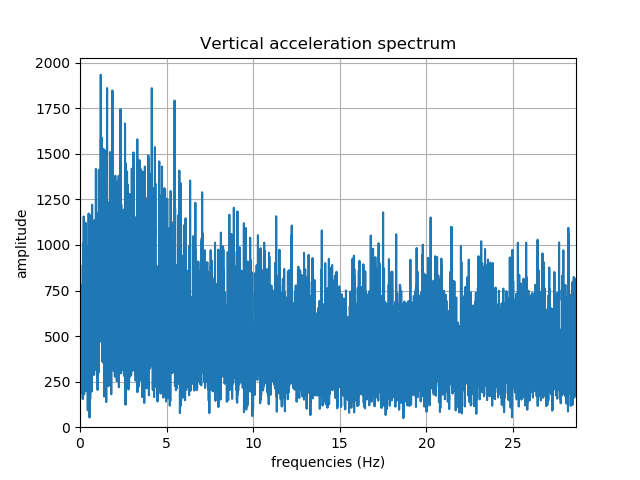

<class 'numpy.ndarray'>


In [228]:
plt.figure()
print(type(freq))
plt.plot(freq[:N//2],A)
plt.xlabel('frequencies (Hz)')
plt.ylabel('amplitude')
plt.title('Vertical acceleration spectrum')
plt.axis([0, freq[N//2-1], 0, None])
plt.grid()
plt.show()

<IPython.core.display.Javascript object>


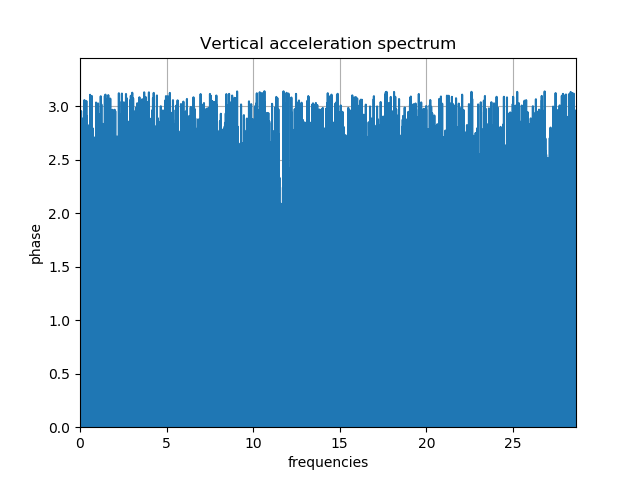

<class 'numpy.ndarray'>


In [229]:
plt.figure()
print(type(freq))
plt.plot(freq,acc_z_phase)
plt.xlabel('frequencies')
plt.ylabel('phase')
plt.title('Vertical acceleration spectrum')
plt.axis([0, freq[N//2-1], 0, None])
plt.grid()
plt.show()

In [230]:
for x in dt:
    print(x)

8796
96873
104672
96822
105632
104854
96767
105549
96778
104831
96803
105702
96746
104736
97602
104845
104906
96671
105581
96783
104814
97608
104837
104743
96793
105622
96827
104835
97572
104784
96761
104820
105637
96800
104767
97586
104802
96845
104805
97634
104738
104804
97571
104884
96762
104746
97629
104784
104880
97583
104766
96771
105602
96875
104779
96784
105566
104845
96744
105634
96843
104713
96815
105625
96791
104818
105569
104822
104801
96827
105633
96724
105600
96902
104766
104864
96655
105630
96821
104822
97563
104771
96816
104780
97593
104877
104752
97591
104791
96818
104826
97607
104748
104800
97583
104863
96785
105701
96646
104805
96824
105638
104776
96773
104801
97650
104856
96733
105667
96733
104761
105660
104835
104742
96766
105642
96836
104731
96820
105597
104832
96817
105536
96795
104786
96802
105640
96826
104743
105627
96755
104855
96801
105578
96758
104832
97590
104891
104699
96908
105520
96788
105643
96842
104735
104805
96770
105707
96729
104774
96795
105604
967

97579
104741
100839
104765
96910
104692
101571
96831
104826
104816
96791
100743
105656
96803
104771
104788
100793
96873
105655
96691
100815
104814
104852
97529
100772
104853
96813
100752
104828
97622
104771
100872
104675
96812
105597
100792
104861
96739
104876
96781
100826
105582
96851
104730
104770
100813
97615
104764
96811
100799
104778
105674
96782
104750
100858
96829
104753
100877
105501
96789
104831
100776
96840
104773
97620
108771
96778
104858
96811
104758
101627
96804
104746
104819
96798
100816
105578
96826
104835
104733
100856
97600
100756
104826
96824
104749
104792
101663
96742
104809
96799
104841
100871
97489
104844
104825
96721
100826
104788
101659
104811
104805
96711
104856
100734
97638
104825
96792
108848
96850
105451
96795
104811
96939
100684
104794
104839
101556
96774
104849
96816
100739
104957
105466
96784
104804
100794
96840
104799
97654
104885
100614
104896
96760
100766
105635
104766
96817
104777
100817
96777
105634
96772
104848
100738
104867
101624
96718
104850
96827

104834
96851
108767
96839
104684
96810
104801
104890
100728
96787
104834
100775
96808
105611
104759
96842
100788
104770
96805
104814
104848
104751
100832
96815
104735
100841
96800
105574
104799
96779
100821
104817
96780
108835
96758
104911
96746
104744
96811
108784
96823
105610
96793
100786
104879
96714
104850
104772
96770
104845
96801
100750
104899
104855
96690
105559
100856
96812
108824
104725
104799
104855
100749
96786
104873
96779
104858
100738
105532
96817
104800
96843
104845
100744
104829
96795
100738
104852
96803
104759
104799
96805
104888
101495
96812
100812
108817
96747
104838
96797
104834
104780
96783
104805
96782
100821
100847
104760
105568
96814
104823
96799
104780
96785
104795
104859
100756
97606
104070
100802
104759
97614
104824
96714
104805
100781
96808
104810
100803
104797
96805
104847
104763
96838
104775
101630
95935
104832
101620
104827
104779
96809
104766
96773
100898
104733
104800
100775
96777
105619
97606
104033
104789
100817
96842
104723
100907
96771
104696
104866

104736
96833
108785
100852
96782
104760
96788
104837
100751
104825
96791
104886
96804
104752
104785
96785
104829
96846
100744
104817
104748
101673
96792
103923
96829
104780
100839
104818
96751
104828
96888
104692
100898
104699
96778
104850
104841
100732
96778
104861
96803
104764
104809
100797
96782
104808
96876
104810
104750
96783
100811
104756
100873
104770
96763
104847
96753
100841
104822
104822
96786
104745
96817
100951
104620
104809
96792
104885
100781
96741
104852
104753
96892
104710
100777
96807
104816
100789
104817
96804
104860
96777
108800
96797
104724
96817
104800
96859
108777
96778
104855
96781
104738
100917
104676
96823
104802
100793
96800
104799
104944
96740
104731
100843
96768
104845
104799
96719
100826
104787
96830
104836
101532
104848
95993
104752
104823
100784
96810
106386
101607
98423
104788
100771
97601
104012
96895
104788
104723
101665
95979
104795
100857
104757
96721
104835
96898
100747
104773
104823
96794
104747
96837
100881
104726
104765
96806
100799
100820
104785

104792
104849
96804
100811
100771
104777
104860
96785
104752
95995
104813
104846
100741
100808
96869
108738
96774
104812
97606
104061
96803
104743
100837
104794
96867
100786
104754
104772
96793
104846
100760
96837
104804
104760
96805
104778
100782
104064
97564
104043
96792
100757
104876
104717
104828
97634
103997
96814
100766
104819
104741
96807
104802
96787
100815
104809
100815
104765
96811
104846
96813
104732
104871
96751
104841
96808
103938
100885
104734
101677
95955
104756
100860
104717
96825
104795
96822
104819
104739
100901
96748
104788
96857
104795
104859
100689
96773
100886
104734
104841
96827
104737
100852
96768
104738
104820
96012
104828
96808
108794
96809
104771
96803
104817
100766
104816
96780
104841
100761
96794
104843
104745
96804
104818
96838
104792
104766
96847
104794
100765
96815
100826
104740
100854
104733
96025
106405
96865
101540
103989
104053
95988
104796
104799
96759
104860
96811
100722
104887
100749
104835
96779
104758
104803
96800
100904
104680
96829
104855
1047

96812
104777
104774
96013
104884
104713
96816
104859
96737
100808
100802
104810
104836
96780
100810
104718
104864
96824
104764
100801
96017
105547
103991
96817
100777
104814
96816
104852
104760
100859
96829
104667
96820
104930
104759
96750
100772
104862
104755
95977
104790
100797
96808
104849
104816
100772
96761
104839
96830
104746
100859
104736
96769
104821
104874
96764
104764
96025
100812
104783
104792
96820
100776
104792
96798
104926
100689
104827
96818
104728
104830
104836
96788
104745
100892
95996
104765
100804
104759
96777
104828
104851
96802
100722
104873
96779
104814
100835
104740
96756
104812
95999
104862
100752
104822
96815
104769
104793
96867
100716
104811
96798
104862
100747
104836
96817
104741
96804
104798
104847
95993
100765
104837
104773
96879
104748
100736
96839
104797
104837
100740
96835
104849
96816
100706
104860
104725
96012
104817
104929
104652
96842
100808
104759
96811
104812
100754
104812
96800
104892
100754
104859
96777
104719
96796
104094
100719
104817
96811
104

In [231]:
print(acc_z_complex_spectrum[N//2-1:N//2+1])
fnyquist = N//2 # spectrum at nyquist frequency must have 0 imaginary part

[-38.764175 -35.105965j 203.95097 +200.86107j ]


In [214]:
x = 2
print(type(x))
print(type(x/2))

<class 'int'>
<class 'float'>


In [215]:
dtmax = np.max(dt) # looking for the longest time interval between two sampletimes
print(dtmax)
print(f'the average sampling time is : {np.mean(dt)}ms') # average sample time
# the highest achievable resolution in frequency is twice the inverse the longest dt
print(1/dtmax) # max freq in rad
print(1/dtmax*360/(2*math.pi))

109699
the average sampling time is : 101521.12289540816ms
9.115853380614226e-06
0.0005222999253692588
